<h1 align = 'center'> Perceptron trick </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

### Create dataset

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,
                           n_redundant=0,n_classes=2, n_clusters_per_class=1,
                           random_state=41,hypercube=False,class_sep=30)

### Data Visualization

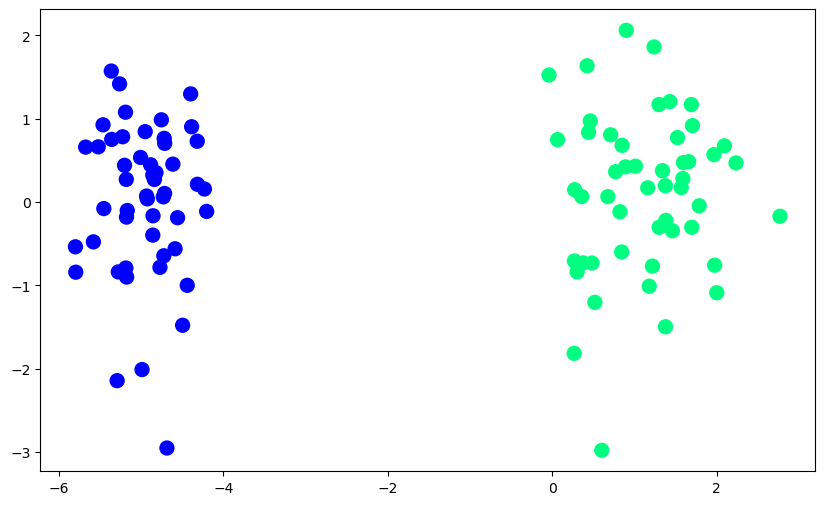

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap='winter', s=100)

### Perceptron Trick

In [4]:
def Perceptron(X,y):
    #Initalization of w, b
    X= np.insert(X,0,1, axis=1) # insert ones in 1st column of X matrix for b =0
    weights = np.ones(X.shape[1]) #w =1
    lr =0.1
    
    for i in range(1000):
        # Select random point
        j= np.random.randint(0,100) # X_shape[0] = 100
        
        y_hat = step(np.dot(X[j], weights))
        
        weights = weights + lr * (y[j]-y_hat)* X[j]
        
    return weights[0], weights[1:]  # b,w

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_, coef_ = Perceptron(X,y)

In [7]:
print("Coeffient = ",coef_)
print("Intercept = ",intercept_)

Coeffient =  [1.1204053  0.40381514]
Intercept =  1.2000000000000002


### Line Ax+By+C = 0 >>> Y = mx +b

In [8]:
m = -(coef_[0]/coef_[1]) # m = -(A / B)
b =-(intercept_/coef_[1]) # b = -(C/B)
    

In [9]:
x_input = np.linspace(-3,3,100)
y_input =  m * x_input +b

(-3.0, 2.0)

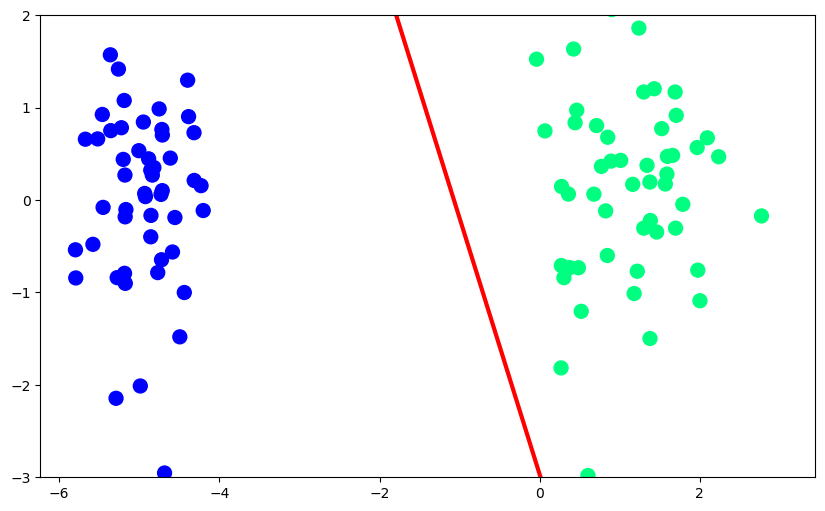

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Animation of Perceptron Trick

- Lets write a function who give weights and bias in term of y = mx+b insted of Ax+By+C=0

In [11]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [12]:
m,b = perceptron(X,y)

In [13]:
b

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -1.5671579130131295,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,
 -2.9716568071029252,


In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation 

In [15]:
# fig, ax = plt.subplots(figsize=(9,5))

# x_i = np.arange(-3, 3, 0.1)
# y_i = x_i*m[0] +b[0]
# ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
# plt.ylim(-3,3)
# def update(i):
#     label = 'epoch {0}'.format(i + 1)
#     line.set_ydata(x_i*m[i] + b[i])
#     ax.set_xlabel(label)
#     # return line, ax

# anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

In [18]:
m = -(logistic.coef_[0][0]/logistic.coef_[0][1])
b = -(logistic.intercept_/logistic.coef_[0][1])

In [19]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

### Logistic regression Vs Perceptron Trick

<IPython.core.display.Javascript object>


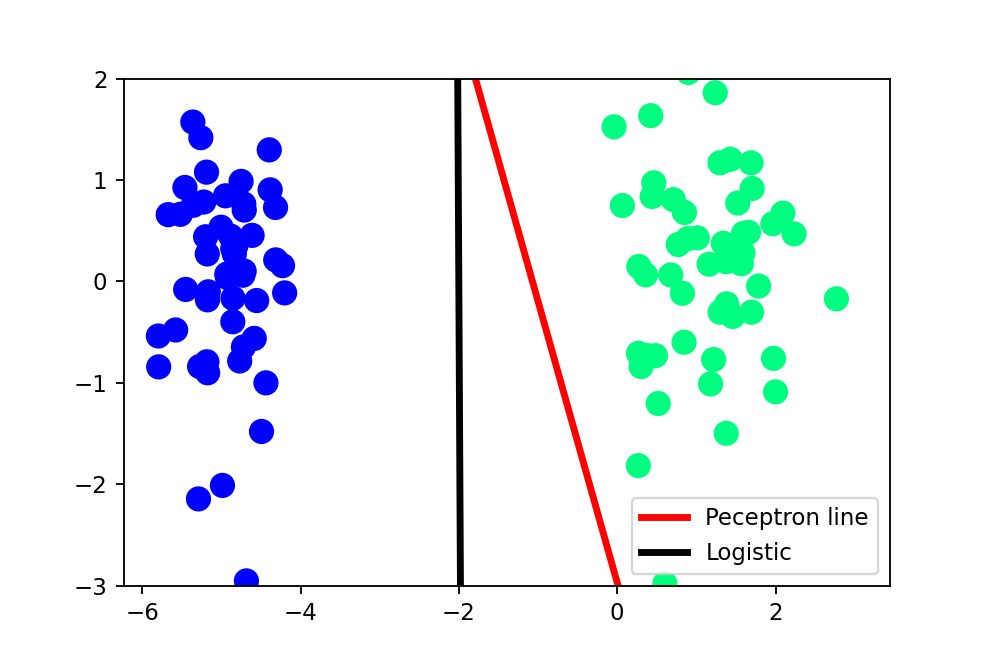

In [25]:
plt.figure(figsize=(6,4))
plt.plot(x_input,y_input,color='red',linewidth=3, label='Peceptron line')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='Logistic')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

- Although __Perceptron__ do the classify data into 2 class, there is one flaw of perceptron trick
- That is if the class have large distance to separate them perceptron trick only classify data into 2 parts. as soon as it classify data algorithm stops.
- It does not take account to seperate them symmetrically and find best fit line
- Where as for __Logistic Regression__ even after it classify data it find bestfit line that evenly separated. so for new test data it work better than perceptron 
- And reduce problem of overfitting